# Task 3 :- Iris Flower CLASSIFICATION

**Objective: Aim is to train a machine learning model that accurately classify the Iris flowers into their respective species.**


In [3]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#loading dataset
df = pd.read_csv("IRIS.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#summary statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [15]:
#checking for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Handling Data Types
- **removing 'iris-' from every value in 'species'**
- **Converting the target variable into categorial from object**

In [18]:
df['species'] = df['species'].str.strip('Iris')
df['species'] = df['species'].str.strip('-')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
df['species'] = df['species'].astype('category')

df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

## Exploratory Data Analysis

In [23]:
#Frequency Counts for categorical column

df['species'].value_counts()

species
setosa       50
versicolo    50
virginica    50
Name: count, dtype: int64

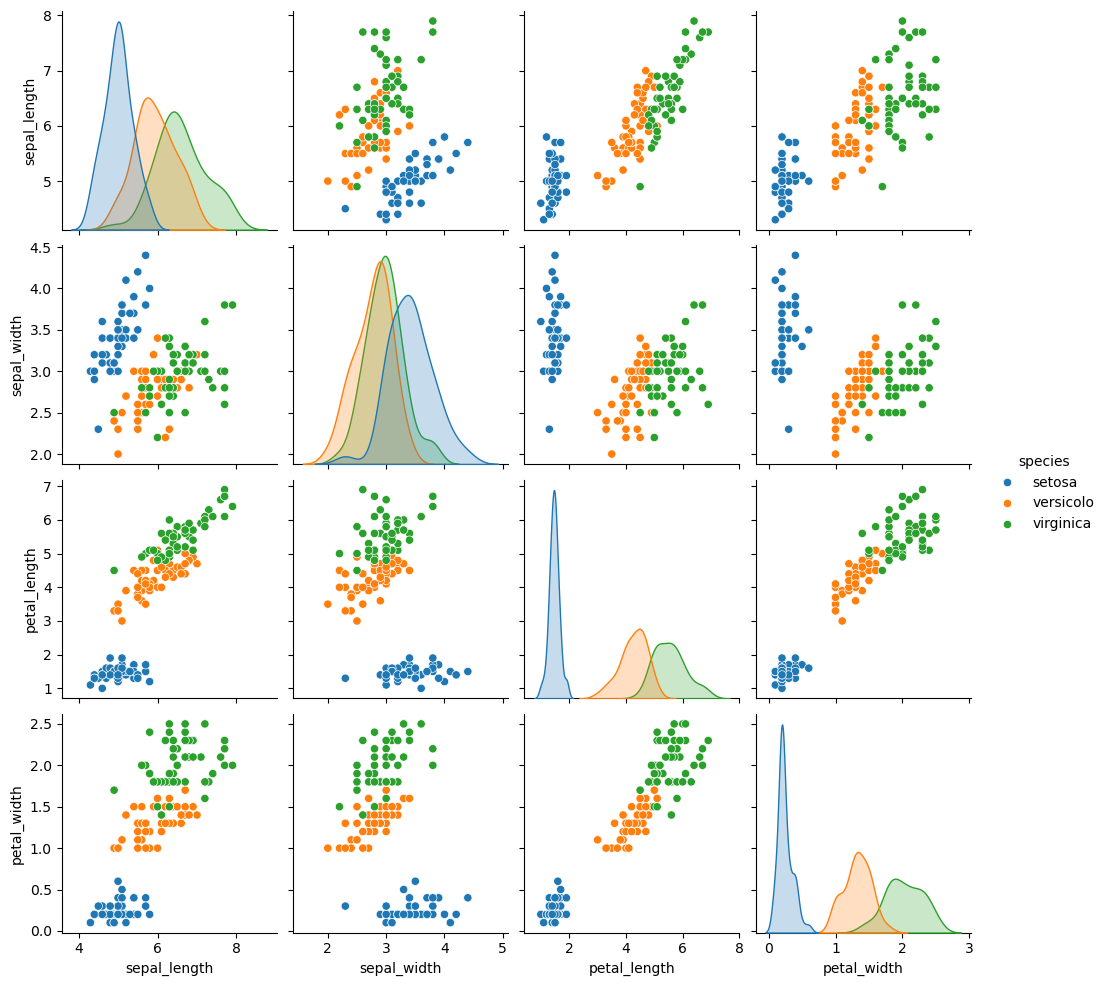

In [25]:
#visualising species with respect to other columns
sns.pairplot(df, hue='species')
plt.show()

### Model Selection & Training
**we will use 4 models and compare the Accuracy.**

In [28]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier


#split data into training and testing
X = df.drop(columns = ['species'], axis = 1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
#initializing models

log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
dtree = DecisionTreeClassifier(random_state = 42)

In [32]:
#train and evaluate Logistic regression

log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print('LOGISTIC REGRESSION \n Accuracy : ', accuracy_score(y_test, y_pred_log_reg))
print('Classification Report :\n ', classification_report(y_test, y_pred_log_reg))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred_log_reg))

LOGISTIC REGRESSION 
 Accuracy :  1.0
Classification Report :
                precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   versicolo       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:
#train and evaluate Random Forest Classifier

random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)

print('RANDOM FOREST CLASSIFIER \n Accuracy : ', accuracy_score(y_test, y_pred_random_forest))
print('Classification Report : \n', classification_report(y_test, y_pred_random_forest))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred_random_forest))

RANDOM FOREST CLASSIFIER 
 Accuracy :  1.0
Classification Report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   versicolo       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [38]:
#train and evalate Decision tree Classifier

dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

print('DECISION TREE CLASSIFIER \n Accuracy : ', accuracy_score(y_test, y_pred_dtree))
print('Classification report : \n', classification_report(y_test, y_pred_dtree))
print('Confusion matrix : \n ', confusion_matrix(y_test, y_pred_dtree))

DECISION TREE CLASSIFIER 
 Accuracy :  1.0
Classification report : 
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
   versicolo       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion matrix : 
  [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Prediction

In [41]:
# Define new data
new_data = pd.DataFrame({
    'sepal_length': [5.1, 6.2],
    'sepal_width': [3.5, 3.4],
    'petal_length': [1.4, 5.4],
    'petal_width': [0.2, 2.3]
})

new_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,6.2,3.4,5.4,2.3


In [43]:
# Predict with Logistic Regression
log_reg_predictions = log_reg.predict(new_data)
print("Logistic Regression Predictions:", log_reg_predictions)

# Predict with Random Forest
random_forest_predictions = random_forest.predict(new_data)
print("Random Forest Predictions:", random_forest_predictions)

# Predict with Decision Tree
dtree_predictions = dtree.predict(new_data)
print("Decision Tree Predictions:", dtree_predictions)

Logistic Regression Predictions: ['setosa' 'virginica']
Random Forest Predictions: ['setosa' 'virginica']
Decision Tree Predictions: ['setosa' 'virginica']
